<a href="https://colab.research.google.com/github/VicentePina7210/DataMiningCleaningExercise/blob/main/Copy_of_CustomKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbour (CMSC4383 Spring 2025)

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

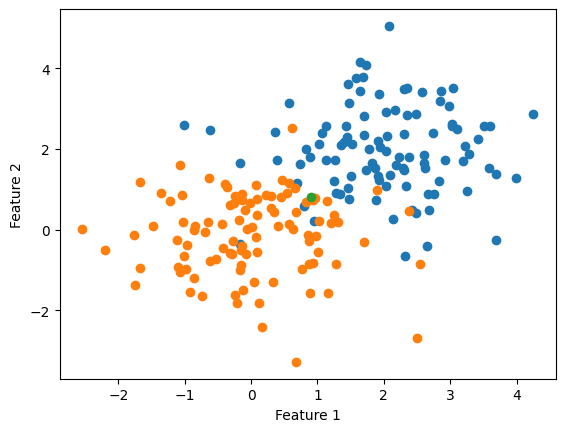

In [3]:
# Generate random synthetic data
N = 100
rand_pos_points = np.random.normal(loc=(2, 2), scale=1, size=(N, 2))
rand_neg_points = np.random.normal(loc=(0, 0), scale=1, size=(N, 2))
x_train = np.concatenate((rand_pos_points, rand_neg_points), axis=0)
y_train = np.concatenate((np.ones((N, 1)), np.zeros((N, 1))), axis=0)

# New point
x_obs = np.array([[0.9, 0.8]])

# plot points
plt.scatter(rand_pos_points[:,0], rand_pos_points[:,1])
plt.scatter(rand_neg_points[:,0], rand_neg_points[:,1])
plt.scatter(x_obs[:,0], x_obs[:,1]) # New point
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# Create train-test split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 2), (40, 2), (160, 1), (40, 1))

In [8]:
class CustomKNN():
    def __init__(self, k):
        self.k = k

    def fit(self, x_train, y_train):
        # This is all there is to training
        self.x_train = x_train
        self.y_train = y_train

    def euclidean_dist(self, array, x):
        return np.sqrt(np.sum((array - x) ** 2, axis=1))

    def predict_one(self, x):
        # 1. Loop through all training values, measure distance for each
        distances = self.euclidean_dist(self.x_train, x)

        # 2. Sort the distance values and return the indices of the k closest points
        indices_of_nearest = np.argsort(distances)[:self.k]

        # 3. Get the labels of the nearest neighbors
        labels_of_nearest = self.y_train[indices_of_nearest].flatten()
        nearest_distances = distances[indices_of_nearest]

        # Compute the weights of nearest with inverse distance
        epsilon = 1e-8
        weights = 1/ (nearest_distances + epsilon)

        # Aggregate weighted votes
        weighted_votes = {}
        for label, weight in zip(labels_of_nearest, weights):
          if label in weighted_votes:
            weighted_votes[label] += weight
          else:
            weighted_votes[label] = weight


        # 4. Aggregate all predictions
        final_pred = max(weighted_votes, key = weighted_votes.get)
        return final_pred

    def predict(self, x_list):
        preds = []
        for x in x_list:
            preds.append(self.predict_one(x))
        return preds

knn = CustomKNN(k=4)
knn.fit(x_train, y_train)

# Get performance stats on training data
pred_y_train = knn.predict(x_train)
print(classification_report(y_train, pred_y_train))

# Get performance stats on test data
pred_y_test = knn.predict(x_test)
print(classification_report(y_test, pred_y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        81
         1.0       1.00      1.00      1.00        79

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        19
         1.0       0.91      0.95      0.93        21

    accuracy                           0.93        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



## Implement distance weights
Implement distance weights to the custom KNN class and run it for the dummy data.

1. How do the outputs of the new KNN compare to the original with no distance weights?
The new KNN results at k=1 were identical which had me confused at first but it makes sense because the weighted distance is irrelevant at k = 1.
At k = 4 we see a bigger difference, the new model has 100% training accuracy and precision. On the testing set we see a 93%/93% accuracy.

Compared to the original model, the new weighted distance model provides a better generalization when it comes to prediciting on the test set.

2. If you don't observe any meaningful difference, what kinds of data do you think would benefit from distance weights

Though the difference is not dramatic, it still improved significantly. Datasets that would benefit more from this would be datasets that have more noise, and maybe more labels.

## KNN for Regression - Ignore

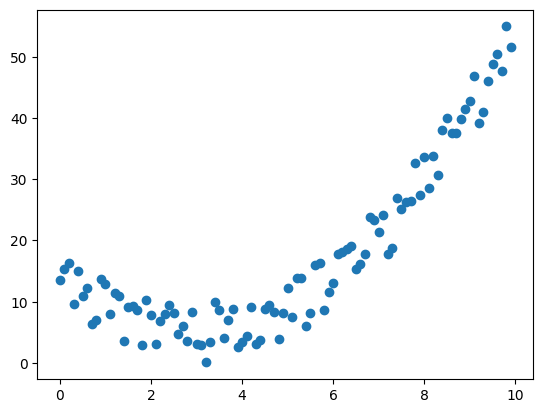

In [ ]:
# How do we adapt for a regression problem?

# Create synthetic data (parabola)
x_train = np.arange(0, 10, 0.1)
y_train = (x_train - 3) ** 2 + 10 * np.random.rand(100)

plt.scatter(x_train, y_train)
plt.show()